# Introduction t Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2023-10-22 14:55:28.172812: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-22 14:55:28.204001: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 14:55:28.349515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 14:55:28.349561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 14:55:28.350621: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

2.14.0


## Creating data to view and fit

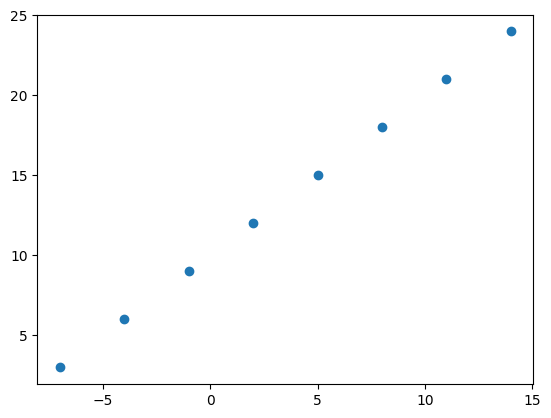

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and Output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our Numpy arrays into Tensor
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

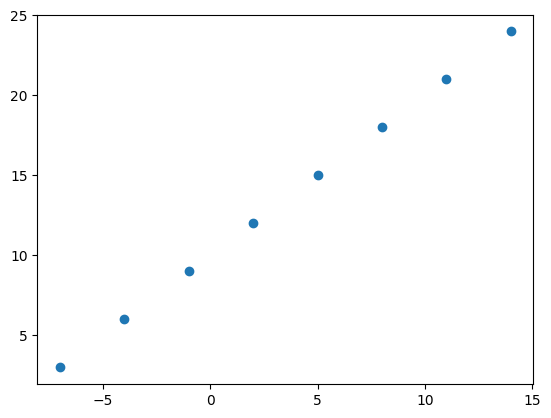

In [7]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels). 

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for measure absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 275ms/step - loss: 10.4851 - mae: 10.4851
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 10.3526 - mae: 10.3526
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 10.2201 - mae: 10.2201
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.0876 - mae: 10.0876
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 9.9551 - mae: 9.9551


In [9]:
# Checkout X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([18.0])
y_pred

1/1 [==============================] - 0s 74ms/step


array([[18.70543]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 219ms/step - loss: 7.6142 - mae: 7.6142
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4813 - mae: 7.4813
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4756 - mae: 7.4756
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4700 - mae: 7.4700
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4644 - mae: 7.4644
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4587 - mae: 7.4587
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4531 - mae: 7.4531
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4475 - mae: 7.4475
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.441

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Let's see if our models's prediction has improved
model.predict([18.0])

1/1 [==============================] - 0s 41ms/step


array([[31.652576]], dtype=float32)

In [14]:
# Let's see if we can make another to improve our model

# 1. Create the model (with hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 13.2981 - mae: 13.2981
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4232 - mae: 10.4232
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4249 - mae: 8.4249
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.4219 - mae: 6.4219
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 4.1602 - mae: 4.1602
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 4.5318 - mae: 4.5318
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 5.3864 - mae: 5.3864
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 5.5443 - mae: 5.5443
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 5.2393 - mae: 5.2393
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 4.6300 - mae: 4.6300
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 3

In [15]:
# Let's see if our models's prediction has improved
model.predict([18.0])

1/1 [==============================] - 0s 51ms/step


array([[28.195105]], dtype=float32)

## Evaluting a model

In practice, a typical workflow you'll go through when building a neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation...there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth ( the originals labels)?

In [16]:
# Make a bigger dataset
X = tf.range(-100,100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

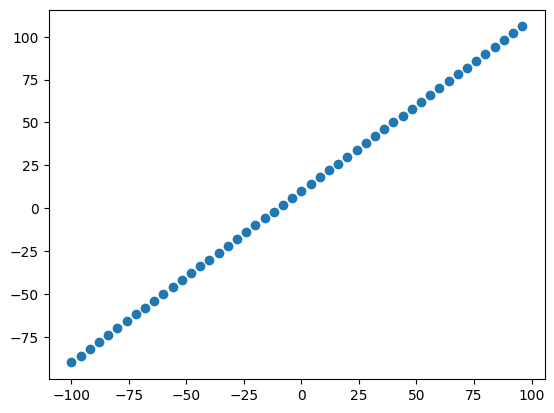

In [18]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [19]:
# Check the length of how many samples we have
len(X)

50

In [20]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets...let's visualize it again!

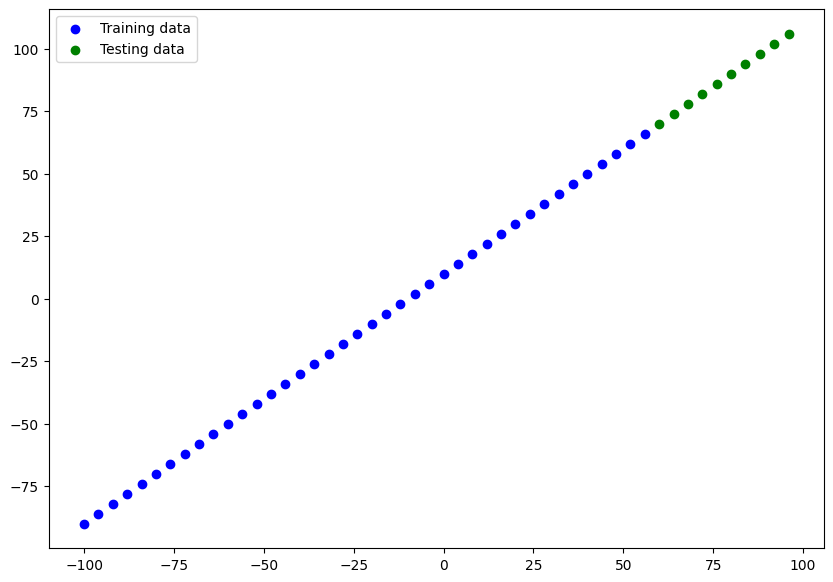

In [21]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend()

In [22]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [23]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [39]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [40]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameter - these aren't updated during training (this is typical when you bring in already learn patterns or parameters from other model during **transfer learning**).

In [41]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [42]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


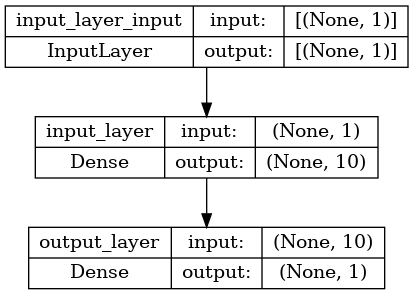

In [43]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True, to_file="model.png")

### Visualizing our model's prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_set` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [44]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 39ms/step


array([[ 70.39301 ],
       [ 74.97188 ],
       [ 79.550735],
       [ 84.12959 ],
       [ 88.70845 ],
       [ 93.287315],
       [ 97.86617 ],
       [102.44503 ],
       [107.02389 ],
       [111.60274 ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    PLots training data, test data and compares predictions to ground truth label
    :param train_data: list of training data
    :param train_labels: 
    :param test_data: 
    :param test_labels: 
    :param predictions: 
    :return: show the legend relation between train_data, train_labels and test_data, test_labels
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

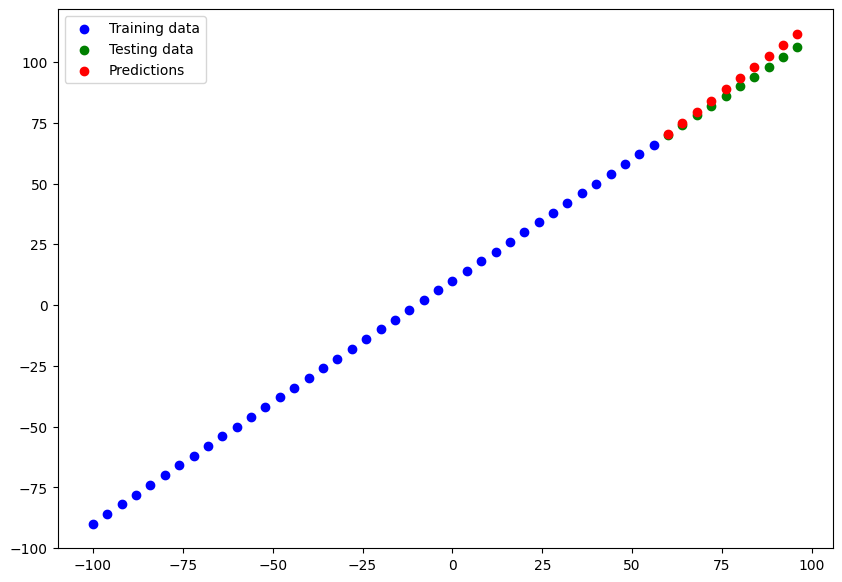

In [47]:
plot_predictions(train_data=X_train, 
                 train_labels=y_train, 
                 test_data=X_test, 
                 test_labels=y_test, 
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [48]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 2.9979 - mae: 2.9979


[2.9978814125061035, 2.9978814125061035]

In [49]:
y_pred

array([[ 70.39301 ],
       [ 74.97188 ],
       [ 79.550735],
       [ 84.12959 ],
       [ 88.70845 ],
       [ 93.287315],
       [ 97.86617 ],
       [102.44503 ],
       [107.02389 ],
       [111.60274 ]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [51]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.685589, 14.216873, 11.779706, 10.374082, 10.      , 10.657463,
       12.346469, 15.156024, 19.023888, 23.602737], dtype=float32)>

In [52]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.39301 ,  74.97188 ,  79.550735,  84.12959 ,  88.70845 ,
        93.287315,  97.86617 , 102.44503 , 107.02389 , 111.60274 ],
      dtype=float32)>

In [53]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.9978814>

In [54]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.75168>

In [64]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model


```Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it > fit it -> evaluate it...```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

#### **Build `model_1`**

In [59]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 47.7876 - mae: 47.7876
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 16.1996 - mae: 16.1996
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 15.0969 - mae: 15.0969
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.1930 - mae: 8.1930
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 10.6578 - mae: 10.6578
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8631 - mae: 9.8631
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.9336 - mae: 8.9336
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0850 - mae: 9.0850
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.6411 - mae: 19.6411
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6166 - mae: 10.6166
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - l

1/1 [==============================] - 0s 37ms/step


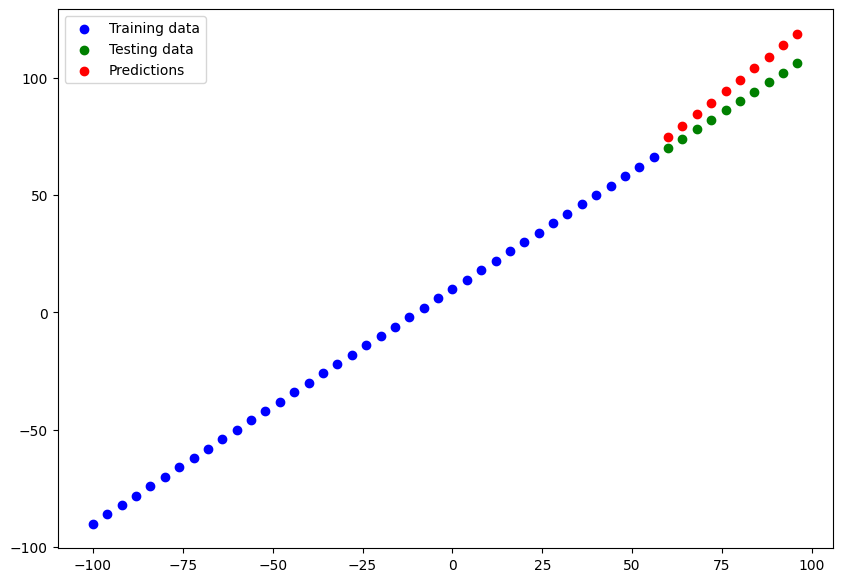

In [60]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [65]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.644353>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.25682>)

#### **Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [71]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 49.3294 - mae: 49.3294
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 35.4981 - mae: 35.4981
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 39.5211 - mae: 39.5211
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.3209 - mae: 27.3209
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9252 - mae: 14.9252
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8939 - mae: 11.8939
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0030 - mae: 13.0030
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1677 - mae: 11.1677
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 41.1247 - mae: 41.1247
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 28.4348 - mae: 28.4348
Epoch 11/100
2/2 [==============================] - 0s 6ms

1/1 [==============================] - 0s 81ms/step


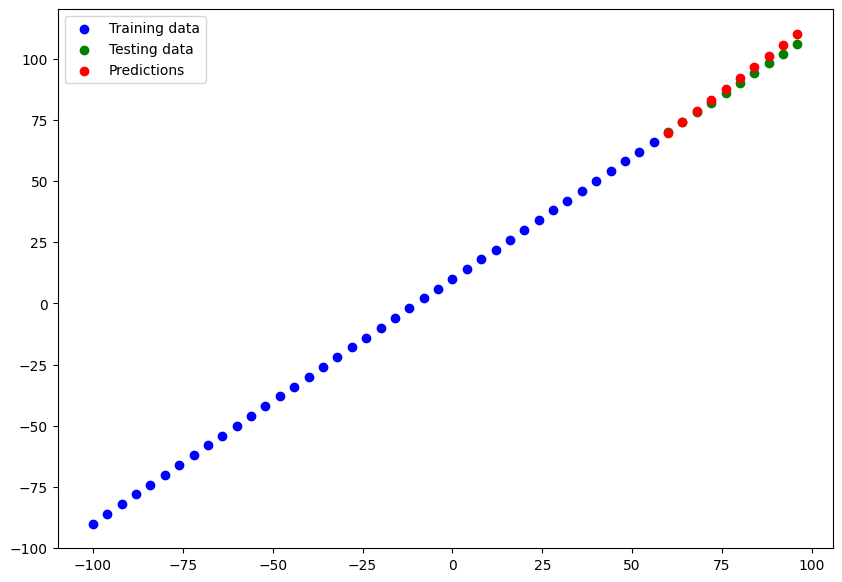

In [72]:
# Make and plot predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [73]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.8926246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.359721>)

#### **Build `model_3`**

* 2 layers, trained for 500 epochs.

In [74]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 5ms/step - loss: 69.7333 - mae: 69.7333
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 29.4044 - mae: 29.4044
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 20.3067 - mae: 20.3067
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 13.1584 - mae: 13.1584
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 16.7488 - mae: 16.7488
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3526 - mae: 11.3526
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 12.3947 - mae: 12.3947
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 10.9897 - mae: 10.9897
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 38.8845 - mae: 38.8845
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 26.4807 - mae: 26.4807
Epoch 11/500
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 28ms/step


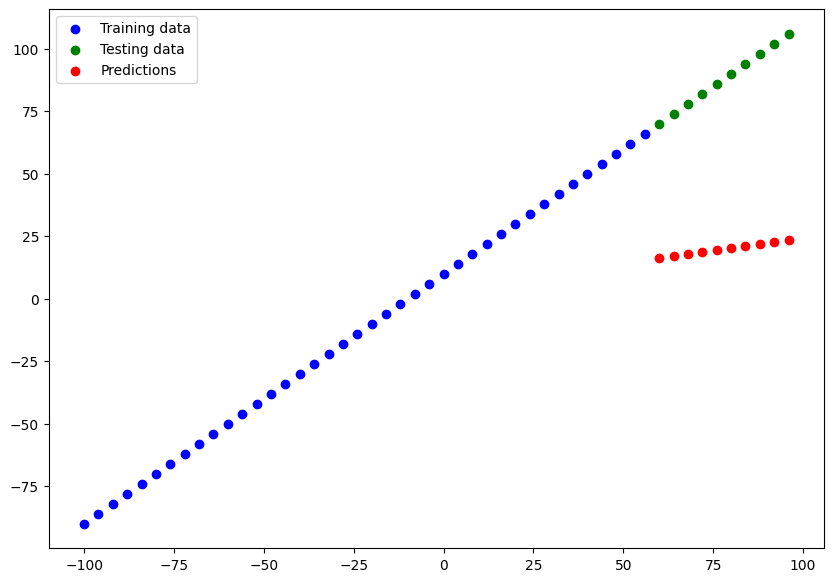

In [75]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [76]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.94086>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4700.593>)

### Comparing the results of our experiments

We're run a few experiments, let's compare the results.

In [78]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.644353,81.256821
1,model_2,1.892625,5.359721
2,model_3,67.940857,4700.592773


Looks like `model_2` performed the best...

In [79]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

* TensorBoard - a component of the TensorFlow library to help track modelling experiments 
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

### Saving our model

Saving our models allow us to use them outside such as in a web application or a mobile app.

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [80]:
# Save model using  the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [81]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/home/dinh/github/tensorflow/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading a saved model

In [82]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Compare model_2 prediction with SavedModel format predition
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 34ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [85]:
# Load in model using HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [86]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 41ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [88]:
# Imported required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [93]:
# Let's try one-hot encode our DataFrame into numerical
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [94]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [95]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [96]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [97]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [103]:
# Build a neural network 
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. Fit the model
insurance_model.fit(tf.constant(X_train), tf.constant(y_train), epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 909us/step - loss: 8673.5049 - mae: 8673.5049
Epoch 2/100
34/34 [==============================] - 0s 919us/step - loss: 7869.6899 - mae: 7869.6899
Epoch 3/100
34/34 [==============================] - 0s 987us/step - loss: 7599.8979 - mae: 7599.8979
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.5498 - mae: 7607.5498
Epoch 5/100
34/34 [==============================] - 0s 862us/step - loss: 7702.8413 - mae: 7702.8413
Epoch 6/100
34/34 [==============================] - 0s 822us/step - loss: 7643.8164 - mae: 7643.8164
Epoch 7/100
34/34 [==============================] - 0s 879us/step - loss: 7547.4067 - mae: 7547.4067
Epoch 8/100
34/34 [==============================] - 0s 751us/step - loss: 7771.3940 - mae: 7771.3940
Epoch 9/100
34/34 [==============================] - 0s 652us/step - loss: 7583.1436 - mae: 7583.1436
Epoch 10/100
34/34 [==============================] - 0s 634us/step - loss: 7719.297

In [105]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 1ms/step - loss: 7703.6240 - mae: 7703.6240


[7703.6240234375, 7703.6240234375]

In [106]:
y_train.mean()

13346.089736364485

#### Right now it looks like our model isn't performing too well...let's try and improve it

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units nad use the Adam optimizer
2. Train for longer 

In [111]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.constant(X_train), tf.constant(y_train), epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 797us/step - loss: 13294.8584 - mae: 13294.8584
Epoch 2/100
34/34 [==============================] - 0s 942us/step - loss: 13131.1934 - mae: 13131.1934
Epoch 3/100
34/34 [==============================] - 0s 834us/step - loss: 12785.7578 - mae: 12785.7578
Epoch 4/100
34/34 [==============================] - 0s 799us/step - loss: 12102.4814 - mae: 12102.4814
Epoch 5/100
34/34 [==============================] - 0s 765us/step - loss: 10950.9346 - mae: 10950.9346
Epoch 6/100
34/34 [==============================] - 0s 764us/step - loss: 9481.5479 - mae: 9481.5479
Epoch 7/100
34/34 [==============================] - 0s 748us/step - loss: 8144.5522 - mae: 8144.5522
Epoch 8/100
34/34 [==============================] - 0s 791us/step - loss: 7516.8184 - mae: 7516.8184
Epoch 9/100
34/34 [==============================] - 0s 807us/step - loss: 7418.0386 - mae: 7418.0386
Epoch 10/100
34/34 [==============================] - 0s 802us/step - lo

In [112]:
# Evaluate new model
insurance_model_2.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 1ms/step - loss: 4863.5830 - mae: 4863.5830


[4863.5830078125, 4863.5830078125]

In [113]:
insurance_model.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 777us/step - loss: 7703.6240 - mae: 7703.6240


[7703.6240234375, 7703.6240234375]

In [118]:
# Set random seed
tf.random.set_seed(42)

# 1.Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. FIt the model
history = insurance_model_3.fit(tf.constant(X_train), tf.constant(y_train), epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 815us/step - loss: 13273.4336 - mae: 13273.4336
Epoch 2/200
34/34 [==============================] - 0s 892us/step - loss: 13062.6484 - mae: 13062.6484
Epoch 3/200
34/34 [==============================] - 0s 739us/step - loss: 12642.1484 - mae: 12642.1484
Epoch 4/200
34/34 [==============================] - 0s 791us/step - loss: 11842.2676 - mae: 11842.2676
Epoch 5/200
34/34 [==============================] - 0s 745us/step - loss: 10563.7939 - mae: 10563.7939
Epoch 6/200
34/34 [==============================] - 0s 764us/step - loss: 9056.4355 - mae: 9056.4355
Epoch 7/200
34/34 [==============================] - 0s 775us/step - loss: 7855.4927 - mae: 7855.4927
Epoch 8/200
34/34 [==============================] - 0s 691us/step - loss: 7456.4683 - mae: 7456.4683
Epoch 9/200
34/34 [==============================] - 0s 812us/step - loss: 7404.9307 - mae: 7404.9307
Epoch 10/200
34/34 [==============================] - 0s 747us/step - lo

In [119]:
# Evaluate our third model
insurance_model_3.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 1ms/step - loss: 3478.1423 - mae: 3478.1423


[3478.142333984375, 3478.142333984375]

In [120]:
insurance_model.evaluate(tf.constant(X_test), tf.constant(y_test))

9/9 [==============================] - 0s 846us/step - loss: 7703.6240 - mae: 7703.6240


[7703.6240234375, 7703.6240234375]

Text(0.5, 0, 'epochs')

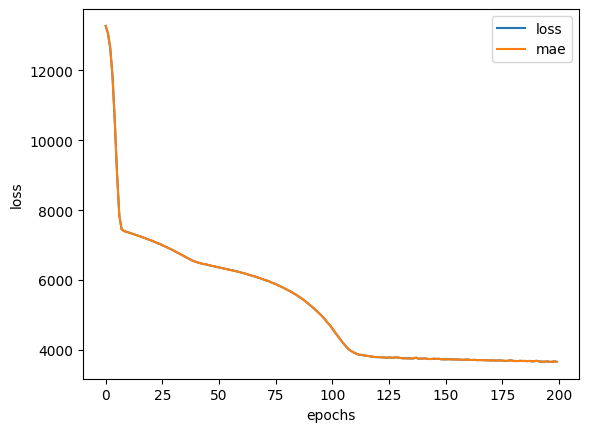

In [121]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)